TP2-Modèle SIR,stratégie optimal de confinement
$$
\begin{cases}
S'(t) = -u(t) \frac{S(t)I(t)}{N(t)}   & t >= 0 \\
I'(t) = u(t)\frac{S(t)I(t)}{N(t)} - \beta I(t)  \\
R'(t) = \beta I(t)  \\
(S(0),I(0),R(0)) = (S_0,I_0,R_0) \\ 
N(t) = S(t) + I(t) + R(t)
\end{cases}
$$

S(t) étant la population saine, I(t) la population infecté et R(t) la population morte ou guéries ( hors du cycle sain/infecté)  
u(.) dans [0,$\alpha$] u() = 0 donne un confinement totale et u = $\alpha$ un confinement nul

In [7]:
import numpy as np
import matplotlib.pyplot as plt 


In [8]:
alpha = 0.34 # taux d'infection 
beta = 0.1  # taux mortalité
R0 = alpha/beta # taux  de reproduction
S0 = 6.7e7 -2e4 
I0 = 2e4
R0 = 0
T = 90
N = S0 + I0 + R0
epsilon_tol = 1e-6  # Critère d'arrêt
rho0 = 0.1          # Pas initial
max_iter = 100 

1)

On motive notre choix de $L_t$ pour réduire au maximum l'impact sur les finances tout en permettant de contenir l'infection 

2) 
On a : 

$$
N(t) = S(t) + I(t) + R(t) \\
<=> N'(t) = S'(t) + I'(t) + R'(t) \\
<=> -u(t) \frac{S(t)I(t)}{N(t)}  +  u(t)\frac{S(t)I(t)}{N(t)} - \beta I(t) + \beta I(t) = 0 \\

<=> N'(t) = 0

$$

La dérivée de N est nulle, donc N est constante

3.


In [9]:
u = 0.02

def g(u,alpha):
    return 1/2*(alpha**2-u**2)
def f(I):
    return I**2/2

def Runge_Kunta(S0,I0,R0,Beta,u,T):
    s = [S0]
    i = [I0]
    r = [R0]
    N = S0+I0+R0
    for k in range(0,T):
        k1_s = -u* s[k] * i[k] /N
        k2_s = -u*(s[k]+k1_s/2)*i[k]/N
        k3_s = -u*(s[k]+k2_s/2)*i[k]/N
        k4_s = -u*(s[k]+k3_s)*i[k]/N

        k1_i = u*s[k]*i[k]/N - Beta*i[k]
        k2_i = u*s[k]*(i[k]+k1_i/2)/N - Beta*(i[k]+k1_i/2)
        k3_i = u*s[k]*(i[k]+k2_i/2)/N - Beta*(i[k]+k2_i/2)
        k4_i = u*s[k]*(k3_i+i[k])/N - Beta*(i[k]+k3_i)

        s_1 = s[k] + 1/6*(k1_s+k2_s+k3_s+k4_s)
        i_1 = i[k] + 1/6*(k1_i+k2_i+k3_i+k4_i)
        s.append(s_1)
        i.append(i_1)
        r.append(N - s_1 - i_1) # car Beta*I ne fonctionne pas très bien
        
    return s,i,r



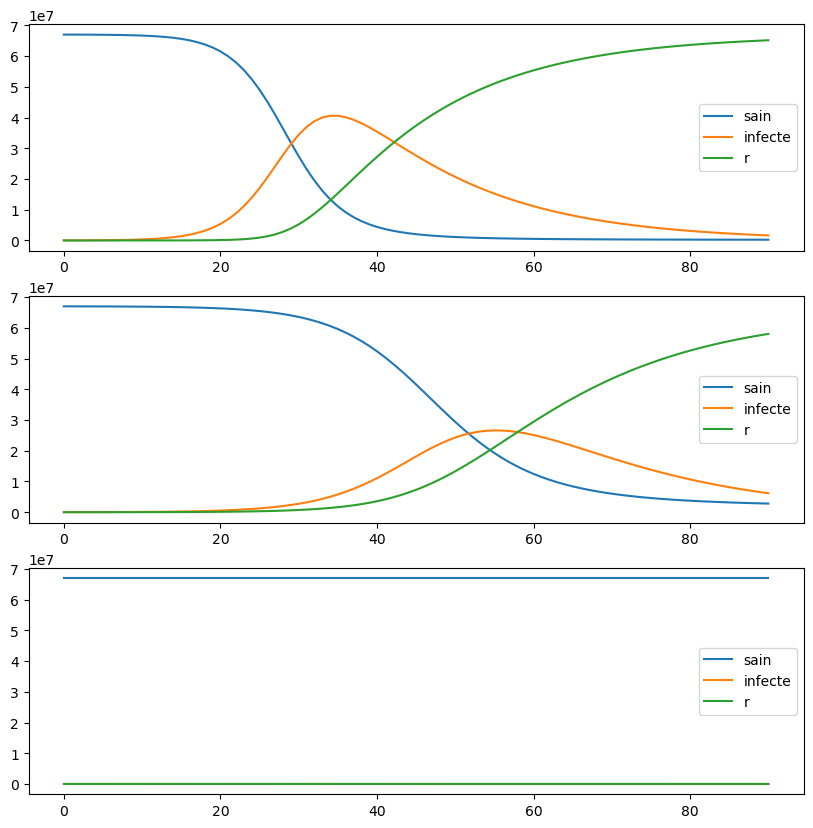

91 91 91


In [10]:
fig,ax = plt.subplots(3,1,figsize=(10,10))
tps = np.arange(T+1)
u = [0.5,alpha,0.00002]
for k in range(3):
    s,i,r = Runge_Kunta(S0,I0,R0,beta,u[k],T)
    ax[k].plot(tps,s,label='sain')
    ax[k].plot(tps,i,label = 'infecte')
    ax[k].plot(tps,r,label = 'r' )
    ax[k].legend()
plt.show()
print(len(s),len(i),len(r))

Avec un controle de l'épidémie,elle durep plus longtemp mais moins de gens tombent malades.Sans controle tout le monde tombe malade avec un grand pique d'infecté.

4.

En explicitant l'expression donner dans la question on obtient: 

$$
DL_\tau(u) \cdot h = 
\lim_{\epsilon \to 0} \left( 
\tau \int_0^T \frac{g(u + \epsilon h) - g(u)}{\epsilon} \, dt
+ (1 - \tau) \int_0^T \frac{f(I_{u+\epsilon h}) - f(I_u)}{\epsilon} \, dt
\right).
$$
$I_{u+\epsilon h}$ la fonction I au controle  $u+\epsilon h$

On va regarder d'abord l'intégrale de g, puis celle de f  
On a : 
$$
\tau \int_0^T \frac{g(u + \epsilon h) - g(u)}{\epsilon} \, dt = \tau \int_0^T g'(u) h dt
$$


Pour l'intégrale de f on va chercher a calculer f'(I(t)) gràce au système de l'adjoint qui est : 

$$
-\frac{d}{dt}
\begin{pmatrix}
P_1 \\
P_2 \\
P_3
\end{pmatrix} =
A^\top
\begin{pmatrix}
P_1 \\
P_2 \\
P_3
\end{pmatrix} +
\begin{pmatrix}
0 \\
f'(I) \\
0
\end{pmatrix},
$$

avec \( P_i(T) = 0 \), et

$$
A =
\begin{pmatrix}
-\frac{uI}{N} & -\frac{uS}{N} & 0 \\
\frac{uI}{N} & \frac{uS}{N} - \beta & 0 \\
0 & \beta & 0
\end{pmatrix}.
$$


On a cherche donc 

$$
(1-\tau) \int_0^T f'(I) \frac{\partial{I}}{\partial{u}} \, dt 
$$

Pour trouver f'(I) on utilise donc le système de l'équation adjoint,

on trouve alors 

$$
f'(I) = -\frac{dP_2}{dt} - \frac{u S}{N} P_1 + \left( \frac{u S}{N} - \beta \right) P_2.
$$

On ne retrouve pas de P3 dedans car $ \frac{dP3}{dt} = 0 $ et $ P3(T) = 0 $

On se retrouve donc en injectant : 

$$
\int_0^T f'(I) \delta I \, dt = \int_0^T \left( 
- \frac{dP_2}{dt} - \frac{u S}{N} P_1 + \left( \frac{u S}{N} - \beta \right) P_2 
\right) \delta I \, dt.
$$

On veut maintenant enlever le $\partial{P2} $

En réalisant une Ipp sur $\partial{P_2} \partial{I}$ on se trouve ainsi : 

$$
\int_0^T \frac{dP_2}{dt} \delta I \, dt = \left[ P_2 \delta I \right]_0^T - \int_0^T P_2 \delta I' \, dt.
$$

or P2(T) = 0 et $\partial{I(0)} = 0 $ car I(0) est fixé en  conditions initial.

Donc on a 

$$
\int_0^T \frac{dP_2}{dt} \delta I \, dt =  \int_0^T P_2 \delta I' \, dt.
$$

Et je ne trouve pas la simplification pour suivre le calcul. mais il faudrais retrouver $-\beta * P2 $ et enlever le  $\delta I'$ 


In [ ]:

dt = 0.1      # Pas de temps
timesteps = int(T / dt)

def g(u, alpha):
    return 0.5 * (alpha**2 - u**2)

def g_prime(u):
    return -u
            
def L_tau(u,I,n,alpha,tau=0.5):
    cost = 0
    for t in range(n):
        cost += tau * g(u, alpha) + (1 - tau) * I[t]
    return cost 

def grad_L(u,S,I,N,Beta,P1,P2,tau,n):
    grad = 0 
    for i in range(n):
        grad += tau* g_prime(u)+  (1-tau)*S[i]*I[i]/N * (P2[i]-P1[i]) # calcul du gradiant grace a la question 4)
    return grad

def adjoint(u,S,I,R,N,beta,T,dt=0.1):
    
    P1 = np.zeros(T+1)
    P2 = np.zeros(T+1)
    for i in range(T-1,-1,-1):
        dP1 = (P1[i+1]-P2[i+1])* u*I[i]/N  # equation obtenues via le système adjoint
        dP2  =  u*S[i] / N * P1[i+1] - P2[i+1]*(u*S[i]/N-beta) - I[i]

        P1[i] = P1[i+1] + dP1*dt
        P2[i] = P2[i+1] + dP2*dt


    return P1,P2



def gradient(u0,S0,I0,R0,N,beta,alpha,T,rho = 0.1):
    S,I,R = S0,I0,R0 #cond initial
    n = T+1     #nombre d'elements
    max_iter = 1000
    u = u0
    list_LU = [] #liste des L_tau(u)
    delta = 20
    converge = True
    erreur = 1e2
    eps = 1e-3

    while erreur > eps:
        rhok = rho
        cp = 0 

        S,I,R = Runge_Kunta(S0,I0,R0,beta,u,T) # on calcule SIR en fonction du u 
        L_r_u = L_tau(u,I,n,alpha,0.5)          # on calcul L_tau(u)
        P1,P2 = adjoint(u,S,I,R,N,beta,T)       #on calcul P1 , P2 depuis l'adjoint
        grad_L_r_u = grad_L(u,S,I,N,beta,P1,P2,0.5,n)   # on calcul le gradient de L_tau(u)
        delta = (L_tau(u-rhok*grad_L_r_u,I,n,alpha))-L_tau(u,I,n,alpha) #on calcul le delta de l'algo donné

        while cp < max_iter or delta  > 0:

            rhok = rhok/1.3      #on reduit rho
            delta = (L_tau(u-rhok*grad_L_r_u,I,n,alpha))-L_tau(u,I,n,alpha) # on update le delta
            cp += 1
        
        list_LU.append(L_r_u)
        u = np.minimum(alpha,np.maximum(u-rhok*grad_L_r_u,0)) # formule de projection de u 
        erreur = abs((L_tau(u,I,n,alpha)-L_r_u)/L_r_u) # calcul de l'erreur 

    return u,list_LU

result,List_LU = gradient(u[0],S0,I0,R0,N,beta,0.32,T) # le gradient ne fais pas de boucle, il trouve directement la sortie voulue, et ressort tout le temps u0
print(result) 


0.32


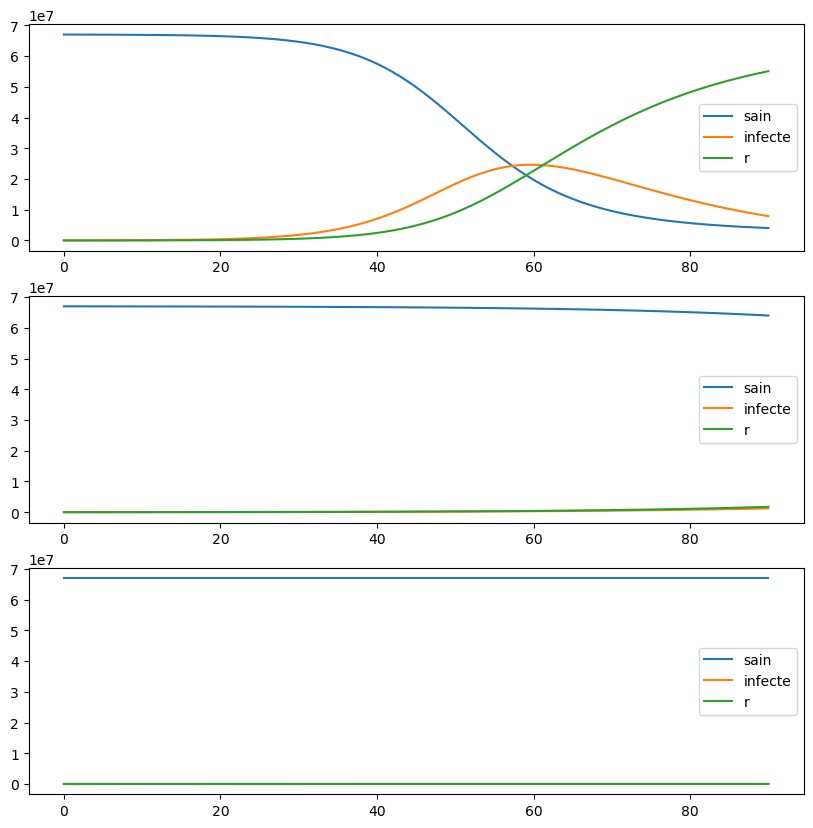

In [12]:
fig,ax = plt.subplots(3,1,figsize=(10,10))
tps = np.arange(T+1)
u0 = [alpha,alpha/2,0.002]

for k in range(3):
    u_opti,liste = gradient(u0[k],S0,I0,R0,N,beta,0.32,T)
    s,i,r = Runge_Kunta(S0,I0,R0,beta,u_opti,T)
    ax[k].plot(tps,s,label='sain')
    ax[k].plot(tps,i,label = 'infecte')
    ax[k].plot(tps,r,label = 'r' )
    ax[k].legend()
plt.show()